# Płytka sieć neuronowa w PyTorch

### Zaimportujmy zależności

In [5]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt

### Załadujmy dane i od razu przeskalujmy (funkcja ToTensor konwertuje piksele z [0,255] na [0,1])

In [6]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 25407420.03it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94933929.33it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6019414.04it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20797520.49it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Sprawdźmy jak wyglądają dane

In [7]:
train.data.shape

torch.Size([60000, 28, 28])

In [8]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### Zobaczmy konkretne wartości

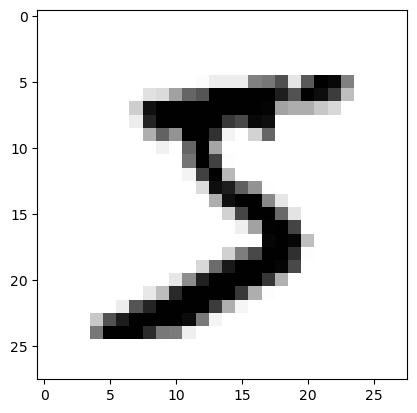

In [10]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [11]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [12]:
train.targets.shape

torch.Size([60000])

In [13]:
test.data.shape

torch.Size([10000, 28, 28])

In [14]:
test.targets.shape

torch.Size([10000])

### Popaczkujmy zbiór danych z wykorzystaniem klasy DataLoader i przejrzyjmy paczki

In [15]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128) 

In [16]:
n_batches = len(train_loader)
n_batches

469

In [17]:
n_test_batches = len(test_loader)
n_test_batches

79

In [18]:
X_sample, y_sample = next(iter(train_loader))

In [19]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [20]:
y_sample.shape

torch.Size([128])

In [21]:
y_sample

tensor([0, 3, 2, 5, 4, 7, 1, 0, 9, 8, 7, 8, 9, 0, 7, 7, 3, 0, 8, 4, 5, 6, 5, 7,
        6, 6, 2, 5, 0, 9, 0, 7, 4, 2, 7, 5, 2, 0, 7, 3, 8, 5, 2, 2, 9, 0, 6, 0,
        5, 5, 5, 8, 7, 7, 9, 7, 3, 5, 0, 1, 1, 9, 7, 6, 1, 5, 8, 0, 6, 0, 9, 8,
        6, 3, 2, 8, 4, 1, 3, 5, 7, 3, 5, 0, 9, 1, 6, 0, 0, 5, 9, 6, 1, 0, 3, 2,
        0, 6, 3, 6, 4, 6, 5, 9, 7, 9, 0, 5, 5, 6, 6, 1, 1, 1, 6, 3, 4, 0, 6, 4,
        1, 7, 5, 2, 8, 4, 8, 4])

In [22]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Spłaszczamy paczkę 
(niespodzianie służy do tego funkcja .view())

In [23]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1)

In [24]:
X_flat_sample.shape

torch.Size([128, 784])

In [25]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### Czas na zaprojektowanie architektury sieci

PyTorch opiera się na modułach (obiektach klasy `torch.nn.Module`), które są łączone w graf obliczeń. Moduły mogą wykorzystywać parametry (obiekty klasy `torch.nn.Parameter`), dla których mogą być automatycznie liczone gradienty i które mogą podlegać optymalizacji.

**Zadanie 1. Zadeklaruj odpowiedni rozmiar wejścia i wyjścia tak, by warstwa wejściowa przyjęła pojedynczo wszystkie piksele obrazka, a warstwa wyjściowa mogła reprezentować każdą z klas**

In [29]:
n_input = 28*28
n_dense = 64
n_out = 10

Tworzymy model, składający się z sekwencji warstw: wejściowej warstwy liniowej czyli warstwy implementującej operację $\hat{y} = Wx + b$, (zwróćmy uwagę na jej liczbę wejść i wyjść), ukrytej warstwy gęstej o 64 neuronach z sigmoidalną funkcją aktywacji oraz wyjściowej warstwy liniowej (tu również zwróćmy uwagę na liczbę wejść)

In [31]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),
    nn.Sigmoid(),
    nn.Linear(n_dense, n_out)
)

In [32]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


### Skonfigurujmy hiperparametry

**Zadanie 2. Zajrzyj do dokumentacji biblioteki torch i zadeklaruj entropię skrośną (CrossEntropy) jako funkcję straty oraz SGD jako algorytm optymalizacji - z parametrami modelu jako parametrami do optymalizacji, oraz ze stałą uczenia równą 0.01**

In [33]:
cost_fxn = 

SyntaxError: invalid syntax (2568787117.py, line 1)

In [ ]:
optimizer = 

### Zdefinujmy metrykę trafności prognozy

**Zadanie 3. Zdefiniuj metrykę trafności prognozy, ustawiając następujące linijki w odpowiedniej kolejności w miejscach ...**
    
    1. correct = (prediction == true_y).sum().item()
    2. (correct / true_y.shape[0]) * 100.0
    3. _, prediction = torch.max(pred_y, 1)


In [ ]:
def accuracy_pct(pred_y, true_y):
    ...
    ...
    return ...

### Wreszcie nauczmy sieć 
(zwróćmy zwłaszcza uwagę na to co się dzieje w zagnieżdżonej pętli)

In [ ]:
n_epochs = 20 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
    avg_cost = 0.0
    avg_accuracy = 0.0
    
    for i, (X, y) in enumerate(train_loader): # enumerate() pozwala iterować po całym popaczkowanym zbiorze  
    
    # wykonujemy feed-forward:
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        cost = cost_fxn(y_hat, y)
        avg_cost += cost / n_batches
    
    # propagacja wsteczna i optymalizacja poprzez algorytm spadku gradientu: 
        optimizer.zero_grad() # ustawiamy gradienty w sieci na zero;
        cost.backward() #obliczamy i zbieramy gradienty
        optimizer.step() #aktualizujemy wagi z wykorzystaniem zebranych gradientów
    
    # obliczamy wartości wyznaczonej wcześniej metryki:
        accuracy = accuracy_pct(y_hat, y)
        avg_accuracy += accuracy / n_batches
    
        if (i + 1) % 100 == 0:
            print('Step {}'.format(i + 1))
            
        print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'.format(epoch + 1, n_epochs, avg_cost, avg_accuracy))

print('Training complete.')

### Testujemy model

**Zadanie 4. Zaimplementuj w gotowej pętli obliczanie trafności na całym zbiorze testowym z wykorzystaniem funkcji accuracy_pct**

In [ ]:
model.eval()

with torch.no_grad(): # dezyaktywacja klasy autograd która oblicza pochodne i rejestruje graf wszystkich operacji wykonanych na tensorze, w tym przypadku chcemy zaoszczędzić pamięc
    avg_test_cost = 0.0
    avg_test_acc = 0.0
    
    for X, y in test_loader:
    
    # dokonujemy prognozy: 
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
    
    # obliczamy koszt: 
        cost = cost_fxn(y_hat, y)
        avg_test_cost += cost / n_test_batches
    
    # tu odpowiedź - obliczamy trafność:
        test_accuracy = 
        avg_test_acc += 

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

### Wizualizacja

**Zadanie 5. Za pomocą dowolnej biblioteki wizualizacji przygotuj 2 wykresy/diagramy/histogramy ilustrujące zebrane wyniki wraz z opisem jakich informacji dostarczają przygotowane wykresy**